<a href="https://colab.research.google.com/github/IyadKhuder/The-Metropolitan-Museum-of-Art/blob/main/NYMM_ML_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import Model,optimizers,utils, regularizers
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import test,config
from PIL import Image , ImageDraw
import os
#from functions import *
from sklearn.model_selection import train_test_split

import tensorflow as tf


#current_path1=os.getcwd()

####directory of images will be used for training and  testing model######
#dire="C:\\Users\\Hayyan\\Downloads\\Compressed\\car_coupling_train\\car_coupling_train"

#y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

#print(current_path1)

2022-12-20 08:27:47.755510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
########## test if there are GPUs 
print('is there GPU:' , test.is_built_with_cuda())
config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(config.list_physical_devices('GPU')))

is there GPU: False
Num GPUs Available:  0


# Preparing dataset

In [ ]:
path="dataset_filtered"

In [ ]:
df = pd.read_csv("df_filtered.csv")
# del df['Unnamed: 0']


In [ ]:
df

,Unnamed: 0,Object_ID,label,imgPath2
0,30805,36471,Prints,df_filtered/36471.jpg
1,30807,36473,Prints,df_filtered/36473.jpg
2,30817,36483,Prints,df_filtered/36483.jpg
3,30819,36485,Prints,df_filtered/36485.jpg
4,30837,36503,Prints,df_filtered/36503.jpg
...,...,...,...,...
495,38458,44615,Sculpture,df_filtered/44615.jpg
496,38642,44799,Sculpture,df_filtered/44799.jpg
497,38681,44838,Sculpture,df_filtered/44838.jpg
498,38685,44842,Sculpture,df_filtered/44842.jpg


In [ ]:
df['label'].unique()

array(['Prints', 'Vases', 'Textiles-Woven', 'Sculpture'], dtype=object)

In [ ]:
labels=dict()
labels['Prints']=0
labels['Sculpture']=1
labels['Vases']=2
labels['Textiles-Woven']=3

In [ ]:
labels

{'Prints': 0, 'Sculpture': 1, 'Vases': 2, 'Textiles-Woven': 3}

In [ ]:
df['lab']=df['label'].apply(lambda x: labels[x])

In [ ]:
label_cat = utils.to_categorical(df['lab'].values, num_classes=4)

In [ ]:
df.tail(155)

,Unnamed: 0,Object_ID,label,imgPath2,lab
345,57475,66823,Textiles-Woven,df_filtered/66823.jpg,3
346,57496,66844,Textiles-Woven,df_filtered/66844.jpg,3
347,57522,66870,Textiles-Woven,df_filtered/66870.jpg,3
348,57536,66884,Textiles-Woven,df_filtered/66884.jpg,3
349,57539,66887,Textiles-Woven,df_filtered/66887.jpg,3
...,...,...,...,...,...
495,38458,44615,Sculpture,df_filtered/44615.jpg,1
496,38642,44799,Sculpture,df_filtered/44799.jpg,1
497,38681,44838,Sculpture,df_filtered/44838.jpg,1
498,38685,44842,Sculpture,df_filtered/44842.jpg,1


In [ ]:
label_cat


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
df

,Unnamed: 0,Object_ID,label,imgPath2,lab
0,30805,36471,Prints,df_filtered/36471.jpg,0
1,30807,36473,Prints,df_filtered/36473.jpg,0
2,30817,36483,Prints,df_filtered/36483.jpg,0
3,30819,36485,Prints,df_filtered/36485.jpg,0
4,30837,36503,Prints,df_filtered/36503.jpg,0
...,...,...,...,...,...
495,38458,44615,Sculpture,df_filtered/44615.jpg,1
496,38642,44799,Sculpture,df_filtered/44799.jpg,1
497,38681,44838,Sculpture,df_filtered/44838.jpg,1
498,38685,44842,Sculpture,df_filtered/44842.jpg,1


In [ ]:
images_paths=df.imgPath2

In [ ]:
image = Image.open(images_paths[4])

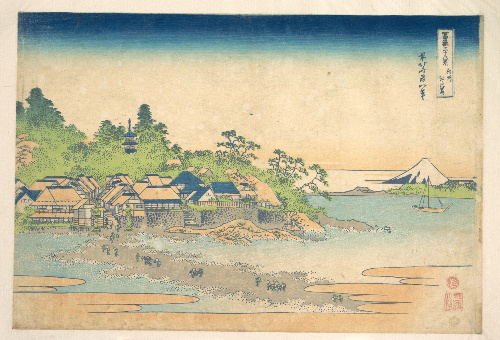

In [ ]:
image

In [ ]:
image.size

(500, 340)

In [ ]:
model_size1=240
model_size2=160
n_images=len(images_paths)

In [ ]:
image1=image.resize((model_size1,model_size2))

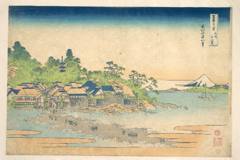

In [ ]:
image1

In [ ]:
imagearray=asarray(image1)

In [ ]:
imagearray.shape

(160, 240, 3)

In [ ]:
n_images

500

In [ ]:
dataset=np.zeros([n_images,model_size2,model_size1,3])   ##initial value
img_index=0
for path in images_paths:
    image = Image.open(path)
    #print(image.size)
    image=image.convert('RGB')
    #image.show()
    image=image.resize((model_size1,model_size2))
    #image.show()
    imagearray=asarray(image)
    #print(imagearray.shape)
    dataset[img_index]=imagearray/255 #### normalize image [0-1]
    #print('shape of image', img_index , 'is' ,imagearray.shape, 'and its type is' ,image.mode )
    print(img_index)
    img_index=img_index+1

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
dataset.shape

(500, 160, 240, 3)

In [ ]:
################################################start############################

In [ ]:
#model_size1=240
#model_size2=240
#####reset path to the original####    
#os.chdir(current_path1)

#####showing last resized image with rectangle of coords, just a test
#last_image=showboxarray(imgarray=imagearray,c1=x1[img_index-1],c2=y1[img_index-1],c3=x2[img_index-1],c4=y2[img_index-1],image_size=model_size)
#fig, ax = plt.subplots(figsize=(7,7)) 
#ax.imshow(last_image) , ax.set_title('last_image')


############reshaping images to fit the CNN mode ##############
imageset=dataset.reshape(n_images,model_size2,model_size1,3)
print('images shape in model input is' , imageset.shape)

####building labels, it is a vector of 4 points, which they are the coordinates for two points af rectangle
#label=np.vstack((np.array(x1),np.array(y1),np.array(x2),np.array(y2))).T
#print ('labels shape is ' , label.shape )

images shape in model input is (500, 160, 240, 3)


In [ ]:
label_cat 

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
image_train , image_test ,label_train ,label_test= train_test_split(imageset, label_cat, test_size=0.2)
print('shape of train images is',  image_train.shape)
print('shape of test images is',  image_test.shape) 
print('train labels shape is ' , label_train.shape )
print('test labels shape is ' , label_test.shape )

shape of train images is (400, 160, 240, 3)
shape of test images is (100, 160, 240, 3)
train labels shape is  (400, 4)
test labels shape is  (100, 4)


now we have imageset in CNN model input , output is the label which defines two coordinates, in the next step we will build our CNN model

# Building Model 

In [ ]:
inputs = Input(shape=(model_size2,model_size1,3))
x = Conv2D(16, (3,3), activation="relu")(inputs)
#x = Conv2D(16, (3,3), activation="relu")(inputs)
#x=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
#x=Dropout(0.5)(x)

x = Conv2D(32, (3,3), activation="relu")(x)
#x=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
##x=Dropout(0.5)(x)



x = Conv2D(64, (3,3), activation="relu")(x)
#x=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
##x=Dropout(0.25)(x)




x = Conv2D(128, (3,3), activation="relu")(x)
#x=Dropout(0.5)(x)
#x=tf.keras.activations.relu(x)
#x=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3,3), activation="relu")(x)
#x=Dropout(0.25)(x)
#x=tf.keras.activations.relu(x)
#x=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(512, (3,3), activation="relu")(x)

#x=tf.keras.activations.relu(x)

#x = MaxPooling2D(pool_size=(2,2 ))(x)


#x = Conv2D(1024, (3,3), activation="relu")(x)

#x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Conv2D(512, (3,3),kernel_regularizer='l2', activation="relu")(x)






x=Flatten()(x)
modelextract=Model(inputs=inputs, outputs=x, name="Model_extract")


#x=Dense(512, activation="relu")(x)
#x=Dense(2048, activation="relu")(x)
#x=Dense(1024, activation="relu")(x)
#x=Dense(64, activation="relu")(x)


output1 = Dense(4,activation='softmax')(x)

#inputs.shape
model = Model(inputs=inputs, outputs=output1, name="Task_model")
model.summary()

Model: "Task_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 119, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 117, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 58, 32)       0         
 2D)                                                             


2022-12-20 08:42:12.987989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 conv2d_2 (Conv2D)           (None, 36, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 26, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 13, 128)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 11, 256)        295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 5, 256)        0         
 2D)                                                             
          

In [ ]:
# CONFIG
batch_size = 64
NUM_EPOCHS = 100
LR = 0.0001

# initiate Adam optimizer
opt = optimizers.Adam(learning_rate= LR)
# building custom metric reveals the accracy of x_coords by number of pixels
#def distance(y_true, y_pred):
        #tensor_distance=model_size*abs((y_true[:,0]+y_true[:,2]-y_pred[:,0]-y_pred[:,2])/2)
        #return  tensor_distance

# Let's train the model
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

checkpoint_filepath = 'check_path/checkpoint'
    
model_checkpoint_callback = ModelCheckpoint(
    verbose = 1,
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)


run_hist = model.fit(image_train, label_train,
              batch_size=batch_size,
              epochs=NUM_EPOCHS,
              validation_data=(image_test, label_test),
              shuffle=True,callbacks=[model_checkpoint_callback])


model.load_weights(checkpoint_filepath)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.3948 - accuracy: 0.2475
Epoch 1: val_accuracy improved from -inf to 0.24000, saving model to check_path/checkpoint
7/7 [==============================] - 19s 2s/step - loss: 1.3948 - accuracy: 0.2475 - val_loss: 1.3606 - val_accuracy: 0.2400
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.3303 - accuracy: 0.3350
Epoch 2: val_accuracy did not improve from 0.24000
7/7 [==============================] - 12s 2s/step - loss: 1.3303 - accuracy: 0.3350 - val_loss: 1.3555 - val_accuracy: 0.2200
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.2050 - accuracy: 0.4425
Epoch 3: val_accuracy improved from 0.24000 to 0.44000, saving model to check_path/checkpoint
7/7 [==============================] - 12s 2s/step - loss: 1.2050 - accuracy: 0.4425 - val_loss: 1.2610 - val_accuracy: 0.4400
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 1.1129 - accuracy: 0.4925
Epoch 4: va

7/7 [==============================] - 14s 2s/step - loss: 0.0568 - accuracy: 0.9800 - val_loss: 0.6431 - val_accuracy: 0.8500
Epoch 30/100
7/7 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9425
Epoch 30: val_accuracy did not improve from 0.87000
7/7 [==============================] - 14s 2s/step - loss: 0.1183 - accuracy: 0.9425 - val_loss: 0.4926 - val_accuracy: 0.8700
Epoch 31/100
7/7 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9650
Epoch 31: val_accuracy did not improve from 0.87000
7/7 [==============================] - 14s 2s/step - loss: 0.0853 - accuracy: 0.9650 - val_loss: 0.8659 - val_accuracy: 0.8100
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9800
Epoch 32: val_accuracy did not improve from 0.87000
7/7 [==============================] - 13s 2s/step - loss: 0.0897 - accuracy: 0.9800 - val_loss: 0.5359 - val_accuracy: 0.8400
Epoch 33/100
7/7 [==============================] - ET

Epoch 59/100
7/7 [==============================] - ETA: 0s - loss: 2.7431e-04 - accuracy: 1.0000
Epoch 59: val_accuracy did not improve from 0.88000
7/7 [==============================] - 13s 2s/step - loss: 2.7431e-04 - accuracy: 1.0000 - val_loss: 0.7156 - val_accuracy: 0.8800
Epoch 60/100
7/7 [==============================] - ETA: 0s - loss: 2.6919e-04 - accuracy: 1.0000
Epoch 60: val_accuracy did not improve from 0.88000
7/7 [==============================] - 14s 2s/step - loss: 2.6919e-04 - accuracy: 1.0000 - val_loss: 0.7219 - val_accuracy: 0.8800
Epoch 61/100
7/7 [==============================] - ETA: 0s - loss: 2.5671e-04 - accuracy: 1.0000
Epoch 61: val_accuracy did not improve from 0.88000
7/7 [==============================] - 13s 2s/step - loss: 2.5671e-04 - accuracy: 1.0000 - val_loss: 0.7220 - val_accuracy: 0.8800
Epoch 62/100
7/7 [==============================] - ETA: 0s - loss: 2.4649e-04 - accuracy: 1.0000
Epoch 62: val_accuracy did not improve from 0.88000
7/7 [==

7/7 [==============================] - ETA: 0s - loss: 1.0446e-04 - accuracy: 1.0000
Epoch 88: val_accuracy did not improve from 0.88000
7/7 [==============================] - 13s 2s/step - loss: 1.0446e-04 - accuracy: 1.0000 - val_loss: 0.7711 - val_accuracy: 0.8800
Epoch 89/100
7/7 [==============================] - ETA: 0s - loss: 1.0376e-04 - accuracy: 1.0000
Epoch 89: val_accuracy did not improve from 0.88000
7/7 [==============================] - 14s 2s/step - loss: 1.0376e-04 - accuracy: 1.0000 - val_loss: 0.7694 - val_accuracy: 0.8800
Epoch 90/100
7/7 [==============================] - ETA: 0s - loss: 1.0146e-04 - accuracy: 1.0000
Epoch 90: val_accuracy did not improve from 0.88000
7/7 [==============================] - 15s 2s/step - loss: 1.0146e-04 - accuracy: 1.0000 - val_loss: 0.7731 - val_accuracy: 0.8800
Epoch 91/100
7/7 [==============================] - ETA: 0s - loss: 9.6060e-05 - accuracy: 1.0000
Epoch 91: val_accuracy did not improve from 0.88000
7/7 [===============

Text(0.5, 1.0, 'Accuracy (x_pixels_distance) over iterations')

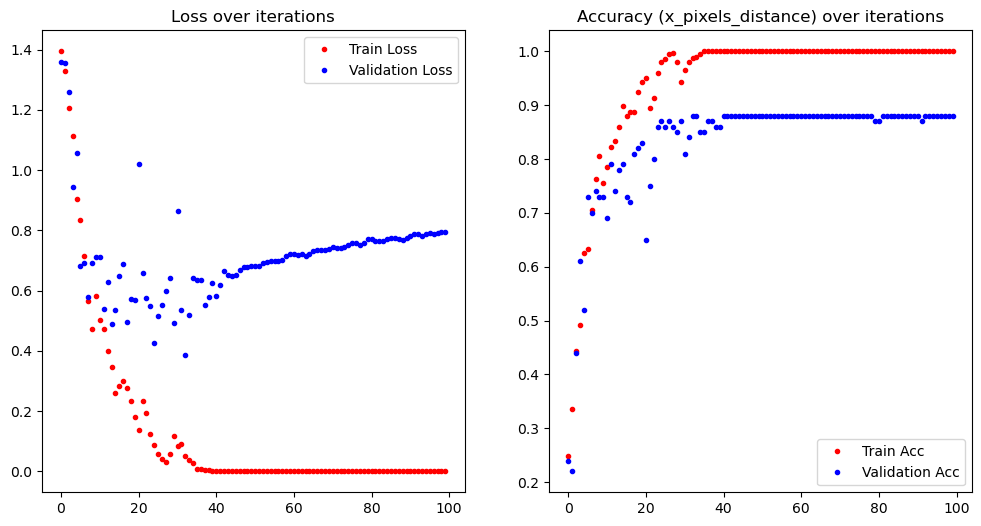

In [ ]:
run_hist.history.keys()
n = len(run_hist.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')
#ax.set_ylim(0,0.1)

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend()
ax.set_title('Accuracy (x_pixels_distance) over iterations')
#ax.set_ylim(0,100)

In [ ]:
# ******** CLASSIFICATION REPORT ***********

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
sample=model.predict(image_test)

4/4 [==============================] - 1s 143ms/step


In [ ]:
#sample

In [ ]:
#label_test

In [ ]:
Y_test = np.argmax(label_test, axis=1) # Convert one-hot to index
y_pred = np.argmax(sample, axis=1)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        32
           1       0.87      0.96      0.91        27
           2       0.91      0.87      0.89        23
           3       0.74      0.94      0.83        18

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100



In [ ]:
############################## Transfer Learning #################

In [ ]:
modelextract.summary()

Model: "Model_extract"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 158, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 119, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 117, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 56, 64)      

In [ ]:
modelextract.trainable=False


input_tl = Input(shape=(model_size2,model_size1,3))
# We make sure that the modelextract is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning
x = modelextract(input_tl, training=False)
#x=Dense(1024, activation="relu")(x)
x=Dense(512, activation="relu")(x)
#x=Dense(256, activation="relu")(x)
output1 = Dense(4, activation='Softmax')(x)
#output_tl = Dense(3, activation='relu')(x)
model_tl = Model(inputs=input_tl, outputs=output1, name="TL_model")

model_tl.summary()

Model: "TL_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 240, 3)]     0         
                                                                 
 Model_extract (Functional)  (None, 1536)              1572768   
                                                                 
 dense_1 (Dense)             (None, 512)               786944    
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 2,361,764
Trainable params: 788,996
Non-trainable params: 1,572,768
_________________________________________________________________


In [ ]:

# CONFIG
batch_size_TL = 64
NUM_EPOCHS_TL = 100
LR_TL = 0.0001



        # initiate Adam optimizer
opt2 = optimizers.Adam(learning_rate=LR_TL)

        # Let's train the model
model_tl.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
        
checkpoint_filepath2 = 'check_path4/checkpoint'
    
model_checkpoint_callback2 = ModelCheckpoint(
    verbose = 1,
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_freq='epoch',
    save_best_only=True)

run_hist_tl = model_tl.fit(image_train, label_train,
              batch_size=batch_size_TL,
              epochs= NUM_EPOCHS_TL,
              validation_data=(image_test, label_test),
              shuffle=True,
              callbacks=[model_checkpoint_callback2])

print('finished')
model_tl.load_weights(checkpoint_filepath2)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 2.3949 - accuracy: 0.5775
Epoch 1: val_accuracy improved from -inf to 0.81000, saving model to check_path4/checkpoint
7/7 [==============================] - 5s 570ms/step - loss: 2.3949 - accuracy: 0.5775 - val_loss: 0.6488 - val_accuracy: 0.8100
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3789 - accuracy: 0.8500
Epoch 2: val_accuracy improved from 0.81000 to 0.86000, saving model to check_path4/checkpoint
7/7 [==============================] - 3s 478ms/step - loss: 0.3789 - accuracy: 0.8500 - val_loss: 0.4079 - val_accuracy: 0.8600
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9650
Epoch 3: val_accuracy improved from 0.86000 to 0.87000, saving model to check_path4/checkpoint
7/7 [==============================] - 3s 501ms/step - loss: 0.1326 - accuracy: 0.9650 - val_loss: 0.4947 - val_accuracy: 0.8700
Epoch 4/100
7/7 [==============================] - E

7/7 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.90000
7/7 [==============================] - 6s 984ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4373 - val_accuracy: 0.8900
Epoch 31/100
7/7 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.90000
7/7 [==============================] - 5s 731ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4438 - val_accuracy: 0.8900
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 628ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4438 - val_accuracy: 0.8900
Epoch 33/100
7/7 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 33: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 

Epoch 60/100
7/7 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 60: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 609ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4870 - val_accuracy: 0.8900
Epoch 61/100
7/7 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 61: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 625ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 0.8900
Epoch 62/100
7/7 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 62: val_accuracy did not improve from 0.90000
7/7 [==============================] - 5s 808ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5086 - val_accuracy: 0.8900
Epoch 63/100
7/7 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 63: val_accuracy did not improve from 0.90000
7/7 [========================

7/7 [==============================] - 5s 678ms/step - loss: 7.3544e-04 - accuracy: 1.0000 - val_loss: 0.5263 - val_accuracy: 0.8900
Epoch 90/100
7/7 [==============================] - ETA: 0s - loss: 6.9252e-04 - accuracy: 1.0000
Epoch 90: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 599ms/step - loss: 6.9252e-04 - accuracy: 1.0000 - val_loss: 0.5317 - val_accuracy: 0.8900
Epoch 91/100
7/7 [==============================] - ETA: 0s - loss: 6.5363e-04 - accuracy: 1.0000
Epoch 91: val_accuracy did not improve from 0.90000
7/7 [==============================] - 5s 666ms/step - loss: 6.5363e-04 - accuracy: 1.0000 - val_loss: 0.5310 - val_accuracy: 0.8900
Epoch 92/100
7/7 [==============================] - ETA: 0s - loss: 6.6915e-04 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 0.90000
7/7 [==============================] - 4s 596ms/step - loss: 6.6915e-04 - accuracy: 1.0000 - val_loss: 0.5362 - val_accuracy: 0.8900
Epoch 93/100
7/7 [

In [ ]:
# ******** CLASSIFICATION REPORT ***********

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
sample=model_tl.predict(image_test)

In [ ]:
#sample

In [ ]:
#label_test

In [ ]:
Y_test = np.argmax(label_test, axis=1) # Convert one-hot to index
y_pred = np.argmax(sample, axis=1)
print(classification_report(Y_test, y_pred))